# Central Limit Theorem (CLT)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style('whitegrid')

In [2]:
mu = 2
std_error = np.sqrt(1/9)
samp_dist = stats.norm(loc=mu, scale=std_error)

In [5]:
samp_dist.sf(x=3.2)

0.0001591085901575332

In [7]:
z = (3.2 - mu) / std_error
z

3.6000000000000005

In [8]:
stats.norm.sf(x=z)

0.0001591085901575332

## Simulations

In [9]:
n = 10
bigN = 1000

In [10]:
# uniform distribution
a = 0
b = 1
dist = stats.uniform(loc=a, scale=b-a)

In [11]:
np.random.seed(101)

In [12]:
means = [np.mean(dist.rvs(size=n)) for _i in range(bigN)]

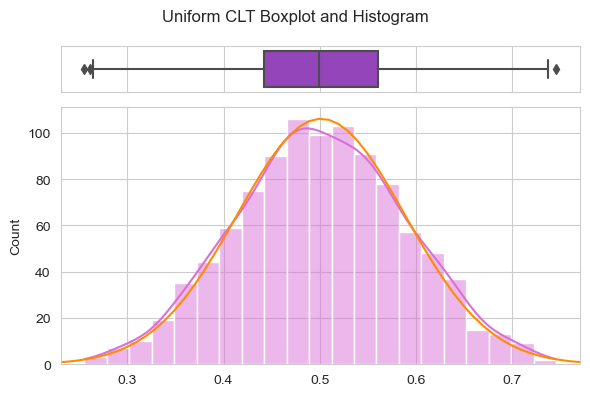

In [13]:
# Plot sample distribution and compare to normal
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': (0.15,0.85)})
fig.suptitle('Uniform CLT Boxplot and Histogram')  # fig.suptitle a useful method for subplots
sns.boxplot(x=means, ax=ax1, color='darkorchid')
sns.histplot(x=means, ax=ax2, color='orchid', kde=True)
fig.tight_layout(pad=1.08)  # Useful function to tighten/loosen spacing in subplots

# Add normal plot for comparison
mu = np.mean(means)
sigma = np.std(means)
xlim = ax2.get_xlim()  # Record current x-limits on plot
pdf_x = np.arange(0.95*xlim[0], 1.05*xlim[1], .01)
pdf_norm = [stats.norm.pdf(x=x, loc=mu, scale=sigma) for x in pdf_x]
pdf_scaled = np.multiply(pdf_norm, ax2.get_ylim()[1] / (1.05*max(pdf_norm)))  # Scale to histogram
ax2.plot(pdf_x, pdf_scaled, color='darkorange')
ax2.set_xlim(xlim)  # Reset x-limits that will have been stretched for the normal plot

plt.show()

In [19]:
# QQ Plot (Quantile-Quantile Plot)
import statsmodels.api as sm

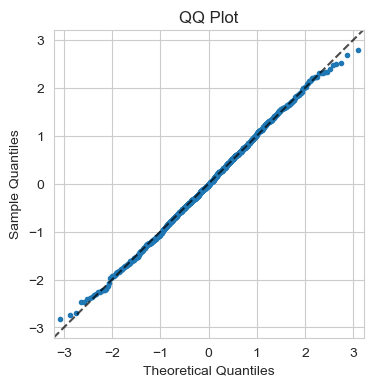

In [26]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('QQ Plot')
pp = sm.ProbPlot(data=np.array(means), dist=stats.norm, fit=True)
qq = pp.qqplot(marker='.', ax=ax)
sm.qqline(ax=ax, line='45', color='black', alpha=0.7, linestyle='--')
plt.show()

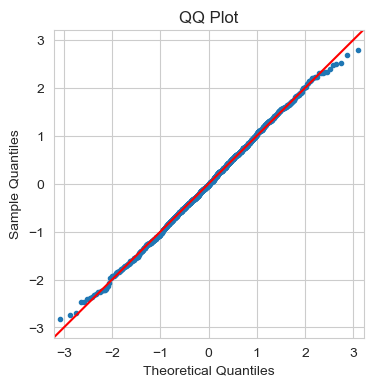

In [28]:
import statsmodels.graphics.api as smg
fig,ax = plt.subplots(figsize=(4,4))
ax.set_title('QQ Plot')
smg.qqplot(data=np.array(means), line='45', fit=True, ax=ax, marker='.')
plt.show()

## Other Distributions

In [29]:
# Creating a function to execute simulation
def run_exp(
    dist, 
    n=10, 
    bigN=1000, 
    seed=None,
    kde=True
):
    '''
    Runs a simulation of "bigN" sample means from sample of size "n", using random seed "seed", from distribution "dist"
    '''
    import numpy as np
    import statsmodels.api as sm
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Run experiment
    np.random.seed(seed)
    means = [np.mean(dist.rvs(size=n)) for _i in range(bigN)]
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': (0.15,0.85)})
    fig.suptitle('CLT Boxplot and Histogram') 
    sns.boxplot(x=means, ax=ax1, color='darkorchid')
    sns.histplot(x=means, ax=ax2, color='orchid', kde=kde)
    fig.tight_layout(pad=1.08)
    
    # Add normal plot for comparison
    mu = np.mean(means)
    sigma = np.std(means)
    xlim = ax2.get_xlim()  # Record current x-limits on plot
    pdf_x = np.linspace(0.95*xlim[0], 1.05*xlim[1], 1000)
    pdf_norm = [stats.norm.pdf(x=x, loc=mu, scale=sigma) for x in pdf_x]
    pdf_scaled = np.multiply(pdf_norm, ax2.get_ylim()[1] / (1.05*max(pdf_norm)))  # Scale to histogram
    ax2.plot(pdf_x, pdf_scaled, color='darkorange')
    ax2.set_xlim(xlim)  # Reset x-limits that will have been stretched for the normal plot
    
    plt.show()
    
    # Also do a QQ plot
    fig, ax = plt.subplots(figsize=(4,4))
    ax.set_title('QQ Plot')
    pp = sm.ProbPlot(data=np.array(means), dist=stats.norm, fit=True)
    qq = pp.qqplot(marker='.', ax=ax)
    sm.qqline(ax=ax, line='45', alpha=0.7, fmt='k--')
    
    plt.show()

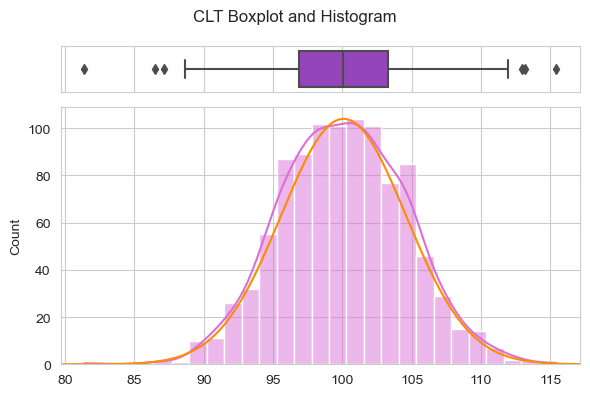

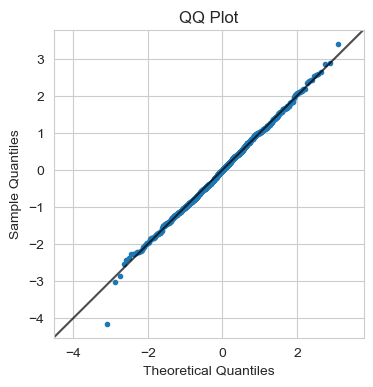

In [45]:
# Chi Squared

df = 100
dist = stats.chi2(df=df)
run_exp(dist=dist, n=10, seed=101)

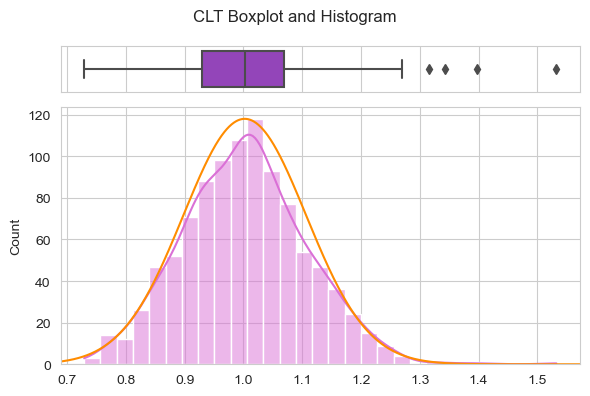

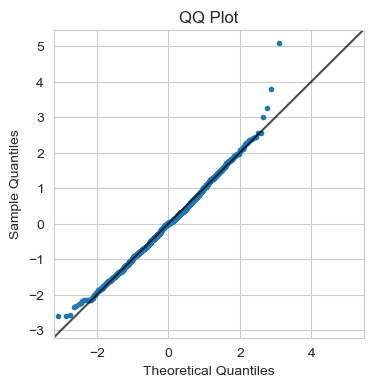

In [41]:
# Exponential
lamb = 1
dist = stats.expon(scale=1/lamb)
run_exp(dist=dist, n=100, seed=101)

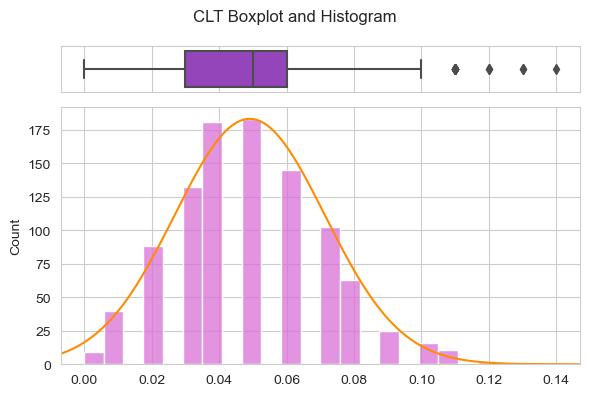

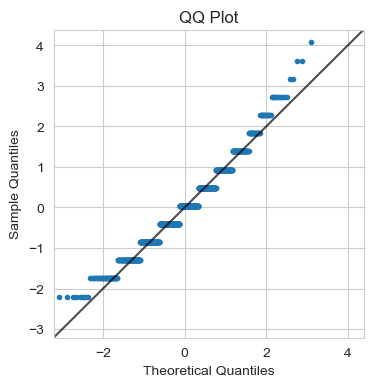

In [48]:
# Bernoulli

p = 1/20
dist = stats.bernoulli(p=p)
run_exp(dist=dist, n=100, kde=False, seed=101)

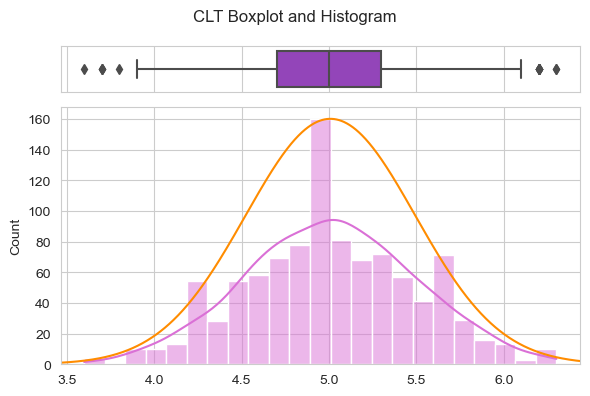

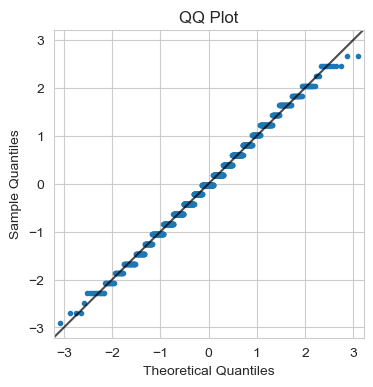

In [54]:
# Binomial

p = 0.5
n = 10
dist = stats.binom(p=p, n=n)
run_exp(dist=dist, n=10, seed=101)

# Progress Check

In [55]:
(9**2/3**2)

9.0

In [57]:

lamb = 1/5
mu = 1/lamb
var = 1/lamb**2

n=125

var

24.999999999999996

In [59]:
sample_var = var/n
sample_var

0.19999999999999998

In [60]:
nu = 4
n = 200

var = nu / (nu -2)
sample_var = var/n
sample_var

0.01

In [61]:
sample_std_dev = np.sqrt(sample_var)
sample_std_dev

0.1

In [62]:
lamb = 1/5
mu = 1/lamb
var = 1/lamb**2

n=125


sdist = stats.norm(loc=mu, scale=var/n)
sdist.sf(5.15)



0.22662735237686765